In [1]:
import os
os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from network import NN
from activation_functions import *
from metrics import *
from prepare_data import read_classification_data, read_regression_data


In [3]:
def cv_network(seeds=[123, 1, 2, 23, 42], build_args=None, fit_args=None):
    scores_test = []
    scores_train = []
    nns  = []
    for s in seeds:
        nn = NN(**build_args, seed=s)
        last_fa = None
        for fa in fit_args:
            nn.fit(**fa)
            last_fa = fa
            nns.append(nn)
            scores_test.append(last_fa['metric'].calculate(last_fa['y_test'], nn.predict(last_fa['x_test'])))
            scores_train.append(last_fa['metric'].calculate(last_fa['y_train'], nn.predict(last_fa['x_train'])))

    return scores_train, scores_test, nns

In [4]:
def average_loss(nns):
    n = len(nns) - 1
    sum_loss_train = np.array(nns[1].history['train'])
    sum_loss_test = np.array(nns[1].history['test'])
    for i in range(2, len(nns)):
        sum_loss_train = np.add(sum_loss_train, np.array(nns[i].history['train']))
        sum_loss_test = np.add(sum_loss_test, np.array(nns[i].history['test']))
    return sum_loss_train / n, sum_loss_test / n

In [5]:
def plot(avg_loss_no_reg, avg_loss_l2):
    idx = len(avg_loss_no_reg[0])
    plt.figure(figsize=[12, 4])
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(idx), avg_loss_no_reg[0], c='blue')
    plt.plot(np.arange(idx), avg_loss_no_reg[1], c='red')
    plt.title('Uśredniona funkcja straty bez regularyzacji')
    plt.subplot(1, 2, 2)
    idx2 = len(avg_loss_l2[0])
    plt.plot(np.arange(idx2), avg_loss_l2[0],c='blue')
    plt.plot(np.arange(idx2), avg_loss_l2[1], c='red')
    plt.title('Uśredniona funkcja straty z regularyzacją L2')
    plt.show()

# Zbiór `Multimodal-Sparse`

In [6]:
df_results = pd.DataFrame(columns=['Dataset','regularization and stop', 'metric', 'best metric train', 'mean metric train', 'best metric test', 'mean metric test'])

In [7]:
ms_x_train, ms_y_train, ms_x_test, ms_y_test = read_regression_data('multimodal-sparse', index_col=None)

### Bez regularyzacji i wcześniejszego stopu

In [8]:
ms_no_reg_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [Tanh(), Tanh(), Tanh(), Linear()]}
ms_no_reg_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': Mse(), 'metric': Mse(), 'verbose_step': 10, 'regularization_rate': 0, 'stop_action' : False},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': Mse(), 'metric': Mse(), 'verbose_step': 10, 'regularization_rate': 0, 'stop_action' : False},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': Mse(), 'metric': Mse(), 'verbose_step': 10, 'regularization_rate': 0, 'stop_action' : False}]
results_ms_train, results_ms_test, ms_nns = cv_network(build_args=ms_no_reg_build, fit_args=ms_no_reg_fit)

Epoch number 10/700
Mse on training set: 3809.39 Mse on test set: 3426.74
Epoch number 20/700
Mse on training set: 2886.78 Mse on test set: 2710.99
Epoch number 30/700
Mse on training set: 2434.61 Mse on test set: 2342.55
Epoch number 40/700
Mse on training set: 2545.67 Mse on test set: 2612.97
Epoch number 50/700
Mse on training set: 2308.09 Mse on test set: 2097.98
Epoch number 60/700
Mse on training set: 2430.24 Mse on test set: 2447.42
Epoch number 70/700
Mse on training set: 1588.57 Mse on test set: 1769.98
Epoch number 80/700
Mse on training set: 3444.96 Mse on test set: 2946.04
Epoch number 90/700
Mse on training set: 1981.15 Mse on test set: 2403.24
Epoch number 100/700
Mse on training set: 1303.11 Mse on test set: 1573.67
Epoch number 110/700
Mse on training set: 3049.12 Mse on test set: 2915.58
Epoch number 120/700
Mse on training set: 1317.39 Mse on test set: 1779.88
Epoch number 130/700
Mse on training set: 2156.01 Mse on test set: 2082.66
Epoch number 140/700
Mse on traini

In [9]:
results_ms_train

[273.1448223592775,
 132.45663740923186,
 108.82301982113492,
 722.3515276541882,
 82.63028801406786,
 40.29489985772878,
 2209.862088809293,
 101.12599405728035,
 57.444027871775305,
 253.87027562527382,
 85.82642048205162,
 60.325425516382964,
 249.86777431837513,
 46.56482847349207,
 4.9996534266479085]

In [10]:
results_ms_test

[805.3183528502451,
 348.83263797203546,
 255.6349906108236,
 817.773423448542,
 383.1863051785118,
 266.88407944553876,
 1854.2235883882247,
 656.8490250777925,
 185.58565211035554,
 619.7233711201472,
 303.64823702405107,
 268.1302574478408,
 685.8539005095773,
 136.95088279717743,
 61.49124364138492]

In [46]:
df_results = df_results.append({'Dataset':'Multimodal-sparse','regularization and stop':'No','metric':'Mse', 
                   'best metric train':round(4.9996534266479085, 3),'mean metric train':round(295.3058455797467,3) ,
                   'best metric test':round(61.49124364138492, 3), 'mean metric test':round(510.0057298414832,3)}, 
                   ignore_index=True)

In [47]:
df_results

,Dataset,regularization and stop,metric,best metric train,mean metric train,best metric test,mean metric test
0,Multimodal-sparse,No,Mse,5.0,295.306,61.491,510.006


### Z regularyzacją L2 i warunkiem stopu

In [16]:
ms_l2_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [Tanh(), Tanh(), Tanh(), Linear()]}
ms_l2_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 700, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': Mse(), 'metric': Mse(), 'verbose_step': 10, 'regularization_rate': 15, 'stop_action' : True, 'stop_treshold' : 50},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1130, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': Mse(), 'metric': Mse(), 'verbose_step': 10, 'regularization_rate': 15, 'stop_action' : True, 'stop_treshold' : 50},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': 1000, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': Mse(), 'metric': Mse(), 'verbose_step': 10, 'regularization_rate': 15, 'stop_action' : True, 'stop_treshold' : 50}]
results_ms_train_l2, results_ms_test_l2, ms_nns_l2 = cv_network(build_args=ms_l2_build, fit_args=ms_l2_fit)

Epoch number 10/700
Mse on training set: 5029.55 Mse on test set: 4349.49
Epoch number 20/700
Mse on training set: 5401.79 Mse on test set: 4836.11
Epoch number 30/700
Mse on training set: 5407.54 Mse on test set: 4757.78
Epoch number 40/700
Mse on training set: 5188.85 Mse on test set: 4601.26
Epoch number 50/700
Mse on training set: 5022.71 Mse on test set: 4436.61
Epoch number 60/700
Mse on training set: 4951.11 Mse on test set: 4471.86
Epoch number 70/700
Mse on training set: 4770.51 Mse on test set: 4224.8
Epoch number 80/700
Mse on training set: 4619.4 Mse on test set: 3981.35
Epoch number 90/700
Mse on training set: 4539.98 Mse on test set: 3968.39
Epoch number 100/700
Mse on training set: 4398.74 Mse on test set: 3757.66
Epoch number 110/700
Mse on training set: 4389.76 Mse on test set: 3821.02
Epoch number 120/700
Mse on training set: 4753.1 Mse on test set: 3770.46
Epoch number 130/700
Mse on training set: 4259.55 Mse on test set: 3678.53
Epoch number 140/700
Mse on training 

In [17]:
results_ms_train_l2

[4444.060595656816,
 3082.4805960023414,
 3062.306913737815,
 3298.3389744725982,
 3466.9960431758723,
 3066.443930272783,
 3445.274474177845,
 3100.5503572383086,
 3065.888195660308,
 3218.600420465803,
 3099.206651227951,
 3068.712273531798,
 3283.6272599913946,
 3086.8675891457306,
 3079.909559354118]

In [18]:
results_ms_test_l2

[3379.9879500468405,
 2798.721125988839,
 2801.2251137962926,
 2939.312423215188,
 2974.505986465139,
 2805.312268191923,
 3004.808888265643,
 2808.430757331347,
 2796.4648869379553,
 2890.4863494773417,
 2825.89083450561,
 2806.070980162204,
 2938.463647416915,
 2807.010339130991,
 2805.1912650598447]

In [20]:
np.mean(results_ms_train_l2)

3257.9509222740985

In [25]:
ms_nns_l2[0].layers[-2].weights

array([[ 3.13289346e-05,  3.38523440e-04, -7.79523371e-05, ...,
        -3.52553811e-04,  6.77029727e-04,  1.00678769e-04],
       [ 6.71528399e-04,  3.79039195e-04, -7.33442765e-04, ...,
        -3.07177502e-04,  6.23988369e-04, -1.19039414e-05],
       [ 1.76769818e-04,  2.30149274e-04, -2.29502780e-04, ...,
         4.40732670e-05, -1.56543446e-04, -1.47612942e-04],
       ...,
       [-1.16991611e-04, -5.79902161e-04,  5.62236112e-04, ...,
        -4.88475359e-04, -3.62441809e-05, -7.28311638e-04],
       [ 5.59229952e-04, -3.54637601e-04, -2.53079630e-06, ...,
        -4.28207245e-04, -5.74730542e-04, -6.76837102e-04],
       [ 4.26267044e-04, -2.85564686e-04, -8.65573615e-05, ...,
        -4.20535734e-04, -5.65506210e-04, -5.70439637e-04]])

In [93]:
df_results = df_results.append({'Dataset':'Multimodal-sparse','regularization and stop':'Yes','metric':'Mse', 
                   'best metric train':round(16.141579167844686, 3), 'mean metric train':round(121.16449420704409,3),
                   'best metric test':round(90.7439467997781, 3), 'mean metric test':round(361.6838615235502,3)}, 
                   ignore_index=True)

In [94]:
df_results

,Dataset,regularization and stop,metric,best metric train,mean metric train,best metric test,mean metric test
0,Multimodal-sparse,No,Mse,5.000,295.306,61.491,510.006
1,Multimodal-sparse,Yes,Mse,15.610,250.710,84.840,550.562
2,Multimodal-sparse,Yes,Mse,16.142,121.164,90.744,361.684


In [26]:
average_ms = average_loss(ms_nns)
average_ms_l2 = average_loss(ms_nns_l2)

ValueError: operands could not be broadcast together with shapes (283,) (279,) 

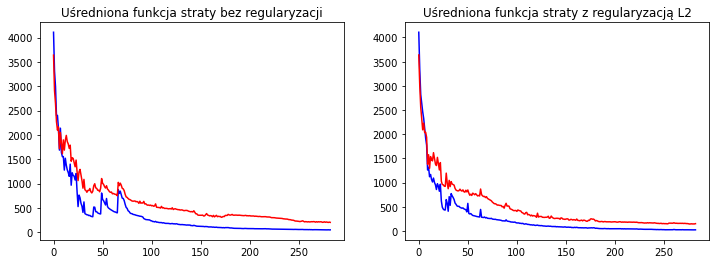

In [90]:
plot(average_ms,average_ms_l2)

# Zbiór `Rings5-Sparse`

In [96]:
r5_x_train, r5_y_train, r5_x_test, r5_y_test = read_classification_data('rings5-sparse')

In [97]:
r5_no_reg_build = {'input_shape': r5_x_train.shape, 'neurons_num': [40, 40, 5], 'activations': [Relu(), Relu(), Softmax()]}
r5_no_reg_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 900, 'learning_rate': 0.0001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': Cross_entropy(), 'metric': F_score(), 'verbose_step': 10, 'regularization_rate': 0, 'stop_action' : False},
                 {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 800, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': Cross_entropy(), 'metric': F_score(), 'verbose_step': 10, 'regularization_rate': 0, 'stop_action' : False}]
results_r5_train, results_r5_test, r5_nns = cv_network(build_args=r5_no_reg_build, fit_args=r5_no_reg_fit)

Epoch number 10/900
F_score on training set: 0.34 F_score on test set: 0.34
Epoch number 20/900
F_score on training set: 0.38 F_score on test set: 0.36
Epoch number 30/900
F_score on training set: 0.42 F_score on test set: 0.38
Epoch number 40/900
F_score on training set: 0.43 F_score on test set: 0.39
Epoch number 50/900
F_score on training set: 0.45 F_score on test set: 0.4
Epoch number 60/900
F_score on training set: 0.44 F_score on test set: 0.39
Epoch number 70/900
F_score on training set: 0.42 F_score on test set: 0.39
Epoch number 80/900
F_score on training set: 0.42 F_score on test set: 0.4
Epoch number 90/900
F_score on training set: 0.44 F_score on test set: 0.41
Epoch number 100/900
F_score on training set: 0.51 F_score on test set: 0.44
Epoch number 110/900
F_score on training set: 0.58 F_score on test set: 0.49
Epoch number 120/900
F_score on training set: 0.6 F_score on test set: 0.52
Epoch number 130/900
F_score on training set: 0.62 F_score on test set: 0.54
Epoch numbe

In [42]:
results_train

[0.85, 0.88, 0.89, 0.91, 0.905, 0.925, 0.885, 0.905, 0.885, 0.895]

In [40]:
results_test

[0.6815,
 0.7465,
 0.7615,
 0.776,
 0.7125,
 0.7405,
 0.7455000000000002,
 0.7605,
 0.715,
 0.7355]

In [44]:
np.mean(results_train)

0.893

In [45]:
df_results = df_results.append({'Dataset':'Rings5-sparse','regularization and stop':'No','metric':'F-score', 
                   'best metric train':round(0.91, 3), 'mean metric train':round(0.893,3),
                   'best metric test':round(0.776, 3), 'mean metric test':round(0.7375,3)}, 
                   ignore_index=True)

In [46]:
df_results

,Dataset,regularization and stop,metric,best metric train,mean metric train,best metric test,mean metric test
0,Multimodal-sparse,No,Mse,4.99,146.766,83.920,287.431
1,Multimodal-sparse,Yes,Mse,6.17,149.576,72.951,314.220
2,Rings5-sparse,No,F-score,0.91,0.893,0.776,0.738


In [98]:
r5_l2_build = {'input_shape': r5_x_train.shape, 'neurons_num': [40, 40, 5], 'activations': [Relu(), Relu(), Softmax()]}
r5_l2_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 900, 'learning_rate': 0.0001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': Cross_entropy(), 'metric': F_score(), 'verbose_step': 10, 'regularization_rate': 0.1, 'stop_action' : True, 'stop_treshold' : 0.05},
            {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': 800, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': Cross_entropy(), 'metric': F_score(), 'verbose_step': 10, 'regularization_rate': 0.1, 'stop_action' : True, 'stop_treshold' : 0.05}]
results_r5_train_l2, results_r5_test_l2, r5_nns_l2 = cv_network(build_args=r5_l2_build, fit_args=r5_l2_fit)

Epoch number 10/900
F_score on training set: 0.34 F_score on test set: 0.35
Epoch number 20/900
F_score on training set: 0.39 F_score on test set: 0.36
Epoch number 30/900
F_score on training set: 0.42 F_score on test set: 0.38
Epoch number 40/900
F_score on training set: 0.43 F_score on test set: 0.4
Epoch number 50/900
F_score on training set: 0.45 F_score on test set: 0.41
Epoch number 60/900
F_score on training set: 0.44 F_score on test set: 0.4
Epoch number 70/900
F_score on training set: 0.42 F_score on test set: 0.39
Epoch number 80/900
F_score on training set: 0.42 F_score on test set: 0.4
Epoch number 90/900
F_score on training set: 0.43 F_score on test set: 0.41
Epoch number 100/900
F_score on training set: 0.46 F_score on test set: 0.42
Epoch number 110/900
F_score on training set: 0.54 F_score on test set: 0.46
Epoch number 120/900
F_score on training set: 0.57 F_score on test set: 0.5
Epoch number 130/900
F_score on training set: 0.61 F_score on test set: 0.53
Epoch number

In [54]:
results_train

[0.715,
 0.7299999999999999,
 0.785,
 0.8000000000000002,
 0.715,
 0.72,
 0.695,
 0.7,
 0.8000000000000002,
 0.81]

In [55]:
results_test

[0.622, 0.628, 0.7055, 0.712, 0.617, 0.6155, 0.6415, 0.654, 0.6635, 0.6605]

In [57]:
np.mean(results_train)

0.7470000000000001

In [58]:
df_results = df_results.append({'Dataset':'Rings5-sparse','regularization and stop':'Yes','metric':'F-score', 
                   'best metric train':round(0.8000000000000002, 3), 'mean metric train':round(0.7470000000000001,3),
                   'best metric test':round(0.712, 3), 'mean metric test':round(0.65195,3)}, 
                   ignore_index=True)

In [59]:
df_results

,Dataset,regularization and stop,metric,best metric train,mean metric train,best metric test,mean metric test
0,Multimodal-sparse,No,Mse,4.99,146.766,83.920,287.431
1,Multimodal-sparse,Yes,Mse,6.17,149.576,72.951,314.220
2,Rings5-sparse,No,F-score,0.91,0.893,0.776,0.738
3,Rings5-sparse,Yes,F-score,0.80,0.747,0.712,0.652
